# **RNN**
A Recurrent Neural Network (RNN) is a type of neural network designed for sequential data (e.g., time series, text, audio). Unlike traditional neural networks (which treat each input independently), RNNs are designed to handle dependencies between elements in a sequence by maintaining a hidden state.

### **Key Idea**
* RNNs have a loop that allows information to persist over time.
* The output at time step t depends not only on the input at time t but also on the output from the previous time step t-1.

### **Mathematical Formulation**
At each time step t, and RNN updates its hidden state h_t using:
$$ h_t = tanh(W_{hh}h_t + W_{xh}x_t + b_h) $$
Where: <br>
* $h_t$ = hidden state at time step t
* $x_t$ = input at time step t
* $W_{hh}, W_{xh}$ = weight matrices
* $b_h$ = bias term
* $tanh$ = activation function (usually tanh or ReLU)

The output is computed as:
$$ y_t = W_{hy}h_t + b_y $$

Where: <br>
* $y_t$ = output at time step t
* $W_{hy}$ = weight matrix for output
* $b_y$ = output bias

## How Information is Passed Through Time:
1. An initial hidden state $h_0$ is created (often initialized to zero)
2. The input at each time step is combined with the hidden state from the previous step.
3. The new hidden state is passed to the next time step.
4. The output is generated based on the current hidden state.

### **Strength of RNNS**
* Good for processing sequences of variable length
* Captures short-term dependencies
* Works well for simple sequential tasks

### **Problems with RNNs**
1. Vanishing Gradient Problem:
    * Gradient shrink too much during backpropagation, making it hard to update weights.
2. Exploding Gradient Problem:
    * Gradients grow too large and cause instability in training.
3. Short-Term Memory Issue:
    * RNNs struggle to remember long-term dependencies.


# **LSTM**
LSTM (Long Short-Term Memory) networks were introduced to solve the vanishing gradient problem and improve the ability to model long-term dependencies.

### **Key Idea**
* LSTM introduces a more complex memory unit called a cell state.
* LSTM regulates the flow of information using three key gates:
    * Forget Gate - Decides what information to forget
    * Input Gate - Decides what new information to store
    * Output Gate - Decides what to output based on the cell state


### **Mathematical Formulation**
At each time step t, LSTM computes:
1. Forget Gate: <br> Decides what information from the previous cell state to forget $$f_t = \sigma(W_f*[h_{t-1}, x_t] + b_f) $$
2. Input Gate: <br> Decides what new information to store in the cell state: $$i_t = \sigma(W_i*[h_{t-1},x_t] + b_i) $$ $$C_t = tanh(W_c*[h_{t-1},x_t] +b_c)$$
3. Cell State Update: <br> Update the cell state: $$C_t = f_t*C_{t-1} + i_t*C_t$$
4. Output Gate: <br> Decide what to output: $$o_t = \sigma(W_o*[h_{t-1},x_t] + b_o$$ $$h_t = o_t*tanh(C_t)$$
where: <br>
* $f_t, i_t, o_t = forget, input, and output gate activations$
* $\sigma$ = sigmoid activation function (range: 0 to 1)
* $C_t$ = candidate cell state update

### **Why LSTM Works Better Than RNN**
* Better at capturing long-term dependencies
* Solves vanishing gradient problem using forget gates
* Selectively remembers useful information


### **When to Use What**
* Use RNN - If the sequence is short or dependencies are simple
* Use LSTM - If the sequence is long and requires learning long-term dependencies.

# **RNN Example in Pytorch**

In [15]:
import torch
import torch.nn as nn

# Define hyperparameters
input_size = 1  # Input dimension (e.g., 1 for single feature)
hidden_size = 32  # Number of hidden units
num_layers = 1  # Number of RNN layers
output_size = 1  # Output dimension
sequence_length = 10  # Number of time steps
batch_size = 16

# Create a simple RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)  # Initial hidden state
        out, _ = self.rnn(x, h0)  # RNN forward pass
        out = self.fc(out[:, -1, :])  # Take the output at the last time step
        return out

# Create the model
model = SimpleRNN(input_size, hidden_size, num_layers, output_size)

# Example input data (batch_size, sequence_length, input_size)
x = torch.randn(batch_size, sequence_length, input_size)
output = model(x)

print("Input shape:", x.shape)     # Should be [16, 10, 1]
print("Output shape:", output.shape)  # Should be [16, 1]


Input shape: torch.Size([16, 10, 1])
Output shape: torch.Size([16, 1])


### **Explanation**
1. The model takes an input of shape (batch_size, sequence_length, input_size).
2. The RNN process the input and maintains a hidden state.
3. The last output (out[:, -1, :]) is passed through a linear layer to generate the final output.
4. The model is simple but effective for short sequences.

# **LSTM Example in Pytorch**
The structure is similar, but LSTM includes extra gates (forget, input, output) internally.


In [17]:
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)  # Initial hidden state
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)  # Initial cell state
        out, _ = self.lstm(x, (h0, c0))  # LSTM forward pass
        out = self.fc(out[:, -1, :])  # Take the output at the last time step
        return out

# Create the model
model = SimpleLSTM(input_size, hidden_size, num_layers, output_size)

# Example input data
x = torch.randn(batch_size, sequence_length, input_size)
output = model(x)

print("Input shape:", x.shape)     # Should be [16, 10, 1]
print("Output shape:", output.shape)  # Should be [16, 1]


Input shape: torch.Size([16, 10, 1])
Output shape: torch.Size([16, 1])


### **Explanation**
1. Similar structure to RNN, but LSTM maintais both:
    * Hidden State - Keeps track of the short-term information
    * Cell State - Maintains long-term information.
2. The model outputs the final output based on the last time step.

C:\Users\dohyu\AppData\Local\Temp\ipykernel_6436\513928763.py:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  X = torch.tensor(X).float().unsqueeze(-1)  # Shape: [samples, seq_length, 1]


Epoch [0/20], Loss: 0.4946
Epoch [5/20], Loss: 0.4457
Epoch [10/20], Loss: 0.3755
Epoch [15/20], Loss: 0.2288


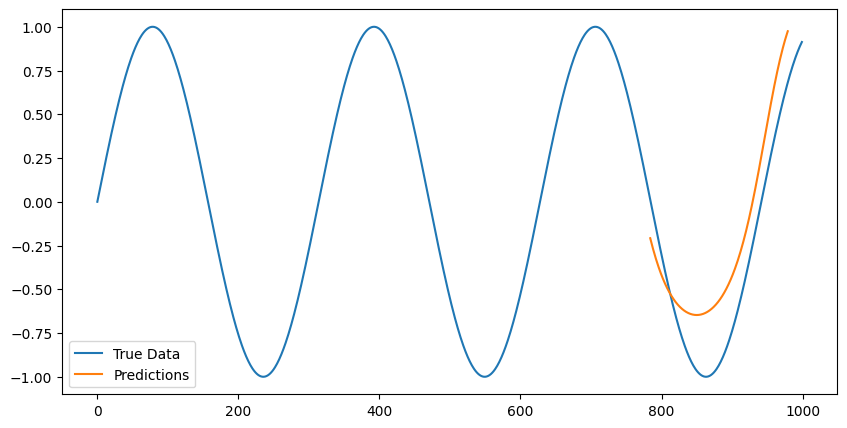

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sine wave dataset
T = 20
L = 1000
x = np.linspace(0, T, L)
y = np.sin(x)

# Prepare training data
seq_length = 20
X, Y = [], []
for i in range(L - seq_length):
    X.append(y[i:i + seq_length])
    Y.append(y[i + seq_length])

X = torch.tensor(X).float().unsqueeze(-1)  # Shape: [samples, seq_length, 1]
Y = torch.tensor(Y).float().unsqueeze(-1)  # Shape: [samples, 1]

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Create LSTM model
input_size = 1
hidden_size = 64
num_layers = 2
output_size = 1
model = SimpleLSTM(input_size, hidden_size, num_layers, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 5 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate model
model.eval()
predictions = model(X_test).detach().numpy()

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y, label='True Data')
plt.plot(range(train_size, train_size + len(predictions)), predictions, label='Predictions')
plt.legend()
plt.show()


### **Explanation**
1. A sine wave is used as the dataset (classic time-seires task)
2. The LSTM is trained to predict the next value in the sequence
3. After training, the predictions are plotted against the true data